# IMEC2201 Herramientas Computacionales 
## Semana 7: Ecuación Diferencial Ordinaria (ODE)
### Clase 14: Aplicación ODE: Dinámica

Universidad de los Andes — Mayo 18, 2022.

---

## TABLA DE CONTENIDO

### Sección 1: Sistemas Dinámicos [→](#section1)
- 1.1. Introducción
- 1.2. Cargar Librerías
- 1.3. Ejemplo 1
- 1.4. Ejemplo 2
- 1.5. Ejemplo 3
- 1.6. Ejemplo 4
- 1.7. Ejemplo 5
___

**¡Importante!** Note que la carpeta **week7** contiene dos archivos: `Project.toml` y `Manifest.toml`. Estos configuran el <font color="#FF5733">*ambiente de trabajo*</font> y facilitan el manejo de <font color="#FF5733">librerías</font>.

Para inicializar el ambiente desde Julia REPL, dentro de la carpeta **week7**, ejecute lo siguiente:

```shell
$ (v1.7) pkg > activate .
$ (week7) pkg> instantiate
```

**Nota:** Para acceder al Pkg REPL, escriba el corchete derecho `]` en el Julia REPL. Note que el REPL cambie de color de verde (Julia REPL) a azul (Pkg REPL). Una vez ejecutado el código `activate .`, el prefijo entre paréntesis indica el ambiente activo: cambia de `v1.7` a `week7`.

O, desde Jupyter Notebook, ejecute:

```julia
$ using Pkg
$ Pkg.activate()
$ Pkg.instantiate()
```

**Nota:** La activación del ambiente <font color="#FF5733">*precompila*</font> las librerías por lo que puede tardar un momento su ejecución completa.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería [`Pkg.jl`](https://pkgdocs.julialang.org/v1/environments/) y en el documento dando clic [aquí](https://towardsdatascience.com/how-to-setup-project-environments-in-julia-ec8ae73afe9c).
</div>

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating project at `~/Documents/GitHub/ua-imec2001-hc-202210/content/week7`


In [2]:
Pkg.status()

      Status `~/Documents/GitHub/ua-imec2001-hc-202210/content/week7/Project.toml`
  [0c46a032] DifferentialEquations v7.1.0
  [1dea7af3] OrdinaryDiffEq v6.10.0
  [91a5bcdd] Plots v1.29.0


<a id="section1"></a>
# Sección 1: Sistemas Dinámicos

## 1.1. Introducción

Tengamos presentes las siguientes equivalencias:

#### Movimiento Rectilíneo
$$
\begin{cases}
  v = \frac{dx}{dt} = \dot{x} \\ 
  \\
  a = \frac{dv}{dt} = \frac{d}{dt} \left( \frac{dx}{dt} \right) = \frac{d^2x}{dt^2} = \ddot{x} \\
\end{cases} 
$$

#### Movimiento Rotacional
$$
\begin{cases}
  \omega = \frac{d \theta}{dt} = \dot{\theta} \\ 
  \\
  \alpha = \frac{d \omega}{dt} = \frac{d}{dt} \left( \frac{d \theta}{dt} \right) = \frac{d^2 \theta}{dt^2} = \ddot{\theta} \\
\end{cases} 
$$

#### Generalización 2da Ley de Newton
$$
\begin{cases}
  F = ma \rightarrow F = m \ddot{x} & (1) \\ 
  \\
  T = I \alpha \rightarrow T = I \ddot{\theta} & (2) \\
\end{cases} 
$$

Siendo $F$ la fuerza, $m$ la masa, $a$ la aceleración, $T$ el torque, $I$ el momento de inercia (en nuestros casos de estudio, $I = m L^2$, siendo $L$ la longitud al punto de pivote del giro) y $\theta$ el ángulo de giro.

Aprovecharemos la librería `DifferentialEquations.jl` para dar respuesta a ejercicios de dinámica de manera práctica y eficiente.

¡Empecemos!

## 1.2. Cargar Librerías

In [3]:
using DifferentialEquations
using Plots

## 1.3. Ejemplo 1: Péndulo Simple

<img src='./img/pendulum1.png' width='300' height='300'/>

Partimos de la relación:

$$
T = I \ddot{\theta}
$$

El único componente de la masa que causa un torque en el cuerpo es:

$$
m g \sin \theta
$$

Luego:

$$
\boxed{ \ddot{\theta} + \frac{g}{L} \sin \theta = 0 }
$$

**Nota**: Ejercicio tomado de [aquí](https://www.youtube.com/watch?v=8VJ1CJ55Np0). Este [otro video](https://www.youtube.com/watch?v=xBBXlQ7CmFc) puede apoyar la comprensión del desarrollo.

Modelemos esta ODE de segundo grado para:

- $g = 9.81$
- $L = 5.0$
- $du(t=0) = du_0 = 0$
- $u(t=0) = u_0 = 30$
- $t_{inicial} = 0$
- $t_{final} = 200$

Donde:
- $du$ es la derivada de $u$
- $u$ es la variable que se está resolviendo en estado actual
- $p$ es el parámetro que contiene las variables parametrizadas
- $t$ es el tiempo actual

In [4]:
# Paso 1. Definir el problema
penduloSimple!(du,u,p,t) = -(g/L) * sind(u)

# Constantes
g = 9.81
L = 5.0

# Parámetros
du0 = 0.0
u0 = 30.0
tspan = (0.0, 200.0)

prob = SecondOrderODEProblem(penduloSimple!, du0, u0, tspan)

# Paso 2. Resolver el problema
sol = solve(prob)
sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 53-element Vector{Float64}:
   0.0
   0.001019334014044588
   0.011212674154490468
   0.11314607555894926
   0.6170940626322221
   1.64775093800742
   3.111652484730037
   4.9904677428011475
   7.32889379189729
   9.903476749518656
  12.411429055978711
  15.680994097529968
  19.150380522760557
   ⋮
 148.95283483650408
 153.32640499328846
 158.28939848064945
 162.58050505974202
 167.60339830686715
 171.95485298624604
 176.9157920535813
 181.40660688968813
 186.25316676726462
 190.84519806678438
 195.51043946536086
 200.0
u: 53-element Vector{ArrayPartition{Float64, Tuple{Float64, Float64}}}:
 (0.0, 30.0)
 (-0.0009999666626423402, 29.999999490349982)
 (-0.010999626510337247, 29.9999383323669)
 (-0.11098927679059156, 29.993720800785344)
 (-0.6042298702499472, 29.813390886901455)
 (-1.5947533395356204, 28.67718707935007)
 (-2.906587492882802, 25.364376611513332)
 (-4.296616410106893, 18.533772787127678)
 (-5.3286

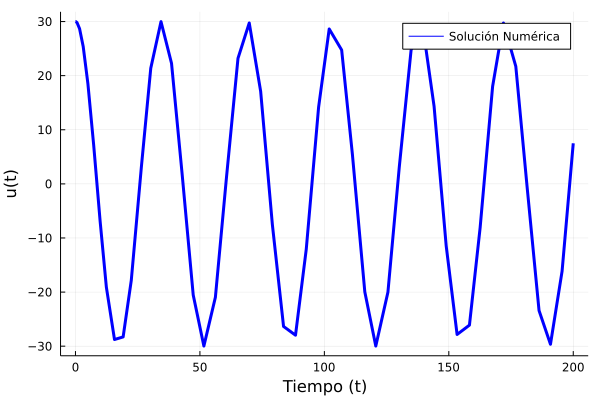

In [5]:
# Paso 3. Analizar la solución
du_sol = [u[2] for u in sol.u]

plot(sol.t,
     du_sol,
     seriestype=:line,
     title="",
     xlabel="Tiempo (t)",
     ylabel="u(t)",
     linewidth=3,
     color=:blue,
     label="Solución Numérica",
     legend=:topright)

## 1.4. Ejemplo 2: Péndulo Simple + Fricción + Fuerza Externa

<img src='./img/pendulum2.png' width='800' height='800'/>

Este caso es una extensión al Ejemplo 1, pues:

$$
F = m a
$$

Luego:

$$
F_0 \cos(\omega t) - mg \sin(\theta) - c \frac{ds}{dt} = ma 
$$

Entonces:

$$
F_0 \cos(\omega t) = m L \ddot{\theta} + c L \dot{\theta} + mg \sin(\theta)
$$

Que se puede reescribir como:

$$
\boxed{ \ddot{\theta} + \alpha \dot{\theta} + \sin(\theta) = \gamma \cos(\beta t) }
$$

Donde:

$$
\begin{cases}
  \alpha = \frac{c}{m \omega_0} \\ 
  \\
  \beta = \frac{\omega}{\omega_0} \\
  \\
  \gamma = \frac{F_0}{m L \omega_0^2}
\end{cases} 
$$

**Nota**: Ejercicio tomado de [aquí](https://www.youtube.com/watch?v=SZWn7x4g-Vo).

Modelemos esta ODE de segundo grado para:

- $c = 0.5$
- $m = 2$
- $\omega_0 = 50$
- $\beta = 0.98$
- $F_0 = 150$
- $L = 8$
- $du(t=0) = du_0 = 0$
- $u(t=0) = u_0 = 30$
- $t_{inicial} = 0$
- $t_{final} = 1000$

Donde:
- $du$ es la derivada de $u$
- $u$ es la variable que se está resolviendo en estado actual
- $p$ es el parámetro que contiene las variables parametrizadas
- $t$ es el tiempo actual

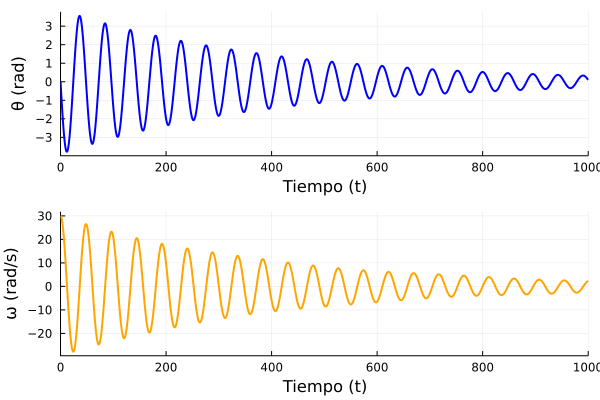

In [6]:
# Paso 1. Definir el problema
penduloFriccionFuerza!(du,u,p,t) = -p[1]*du - sind(u) + p[3]*cosd(p[2]*t) # Juan Sabogal

# Constantes
c = 0.5
m = 2.0
ω₀ = 50.0
β = 0.98
F₀ = 150
L = 8.0

α = c / (m*ω₀)
γ = F₀ / (m*L*(ω₀^2))

# Parámetros
du0 = 0.0
u0 = 30.0
tspan = (0.0, 1000.0)
p = [α, β, γ]

prob = SecondOrderODEProblem(penduloFriccionFuerza!, du0, u0, tspan, p)

# Paso 2. Resolver el problema
sol = solve(prob)

# Paso 3. Analizar la solución
plot(sol,
     linewidth=2,
     xlabel="Tiempo (t)",
     ylabel=["θ (rad)" "ω (rad/s)"],
     color=["blue" "orange"],
     legend=false,
     layout=(2,1))

## 1.5. Ejemplo 3: Masa-Resorte

<img src='./img/spring1.png' width='800' height='800'/>

El escenario de una masa-resorte parte de:

$$
F = m a = m \ddot{x}
$$

En donde se tienen los siguientes elementos presentes:

$$
\begin{cases}
  \text{Ley de Hooke} \rightarrow F_s = -k x \\ 
  \\
  \text{Fricción} \rightarrow \beta = F_f = -c \frac{dx}{dt} = -c \dot{x} \\
  \\
  \text{Fuerza Externa} \rightarrow F_e = F_0 \cos(\omega t)
\end{cases} 
$$

Luego:

$$
F_0 \cos(\omega t) - c \dot{x} - k x = m \ddot{x}
$$

Entonces:

$$
m \ddot{x} + c \dot{x} + k x = F_0 \cos(\omega t)
$$

Que se puede reescribir como:

$$
\boxed{ \ddot{x} + \alpha \dot{x} + \gamma x = \cos(\beta t) }
$$

Donde:

$$
\begin{cases}
  \alpha = \frac{c}{m \omega_0} \\ 
  \\
  \gamma = \frac{m \omega_0^2}{F_0} \\
  \\
  \beta = \frac{\omega}{\omega_0} \\
\end{cases} 
$$

**Nota**: Ejercicio tomado de [aquí](https://www.youtube.com/watch?v=SZWn7x4g-Vo).

Modelemos esta ODE de segundo grado para:

- $c = 100$
- $m = 4.5$
- $\omega_0 = 25$
- $\beta = 0.55$
- $F_0 = 350$
- $du(t=0) = du_0 = 0$
- $u(t=0) = u_0 = 10$
- $t_{inicial} = 0$
- $t_{final} = 10$

Donde:
- $du$ es la derivada de $u$
- $u$ es la variable que se está resolviendo en estado actual
- $p$ es el parámetro que contiene las variables parametrizadas
- $t$ es el tiempo actual

$$
\boxed{ \ddot{x} + \alpha \dot{x} + \gamma x = \cos(\beta t) }
$$

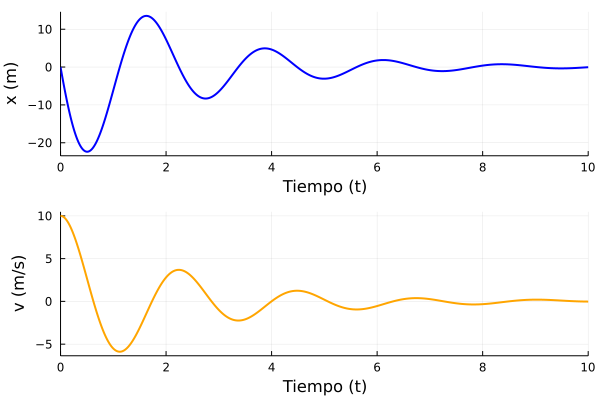

In [7]:
# Paso 1. Definir el problema
masaResorte!(du,u,p,t) = -p[1]*du - p[2]*u + cos(p[3]*t) # Sebastián Cáceres

# Constantes
c = 100
m = 4.5
ω₀ = 25.0
β = 0.55
F₀ = 350

α = c / (m*ω₀)
γ = (m*(ω₀^2)) / F₀

# Parámetros
du0 = 0.0
u0 = 10.0
tspan = (0.0, 10.0)
p = [α, γ, β]

prob = SecondOrderODEProblem(masaResorte!, du0, u0, tspan, p)

# Paso 2. Resolver el problema
sol = solve(prob)

# Paso 3. Analizar la solución
plot(sol,
     linewidth=2,
     xlabel="Tiempo (t)",
     ylabel=["x (m)" "v (m/s)"],
     color=["blue" "orange"],
     legend=false,
     layout=(2,1))

## 1.6. Ejemplo 4: Doble Masa - Doble Resorte

<img src='./img/spring2.png' width='600' height='600'/>

Al igual que en el Ejemplo 5, el escenario de una masa-resorte parte de:

$$
F = m a = m \ddot{x}
$$

En donde se tiene presente la Ley de Hooke:

$$
F_s = -k x
$$

En donde:

$$
\sum F_s = m \ddot{x}
$$

Entonces:

$$
\boxed{
\begin{cases}
  m_1 \ddot{x_1} + (k_1 + k_2) x_1 - k_2 x_2 = 0 & (1) \\ 
  \\
  m_2 \ddot{x_2} + k_2 x_2 - k_2 x_1 = 0 & (2) \\
\end{cases}
}
$$

Note que estas ecuaciones pueden ser escritas como:

$$
[M] \ddot{\vec{X}}(t) + [K] \vec{X}(t) = 0
$$

**Nota**: Ejercicio tomado de [aquí](https://www.youtube.com/watch?v=dqtZwZmMh4w).

Modelemos esta ODE de segundo grado para:

- $k_1 = 200$
- $k_2 = 80$
- $m_1 = 10$
- $m_2 = 20$
- $du(t=0) = du_0 = [0, 0]$
- $u(t=0) = u_0 = [0.025, 0.2]$
- $t_{inicial} = 0$
- $t_{final} = 10$

Donde:
- $du$ es la derivada de $u$
- $u$ es la variable que se está resolviendo en estado actual
- $p$ es el parámetro que contiene las variables parametrizadas
- $t$ es el tiempo actual

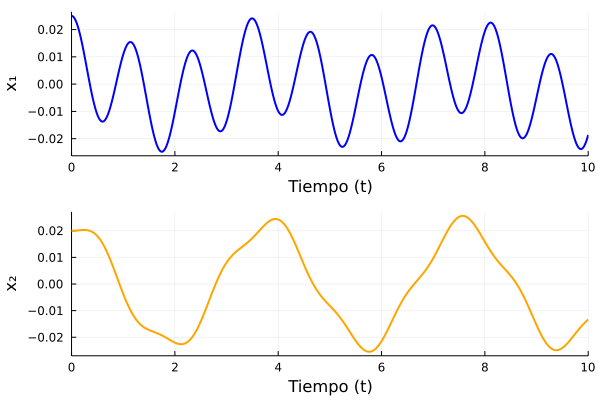

In [8]:
#=
Paso 1. Definir el problema
du[1] -> dx1/dt
du[2] -> dx2/dt

u[1] -> x1
u[2] -> x2
=#
masas2Resortes!(du, u, p, t) = -inv(M)*K*u
    
# Constantes
k₁ = 200.0
k₂ = 80.0
m₁ = 10.0
m₂ = 20.0

K = [k₁+k₂ -k₂;
     -k₂   k₂ ]

M = [m₁ 0 ;
     0  m₂]

# Parámetros
du0 = [0.0, 0.0]
u0 = [0.025, 0.02]
tspan = (0.0, 10.0)

prob = SecondOrderODEProblem(masas2Resortes!, du0, u0, tspan)

# Paso 2. Resolver el problema
sol = solve(prob)

# Paso 3. Analizar la solución
plot(sol,
     vars=[3, 4],
     linewidth=2,
     xlabel="Tiempo (t)",
     ylabel=["x₁" "x₂"],
     color=["blue" "orange"],
     legend=false,
     layout=(2,1))

## 1.6. Ejemplo 5: Dos Masas - Cinco Resortes

<img src='./img/spring3.png' width='600' height='600'/>

Este ejercicio es una extensión del Ejemplo 4. Lo importante es que veremos cómo se resuelve con notación matricial. Partimos de la siguiente relación:

$$
[M] \ddot{\vec{X}}(t) + [K] \vec{X}(t) = 0
$$

La solución es:

$$
\ddot{\vec{X}}(t) = - [M]^{-1} [K] \vec{X}(t) = 0
$$

Guiándonos de las matrices del Ejemplo 4, podemos intuir que:

$$
[M] =
{\begin{bmatrix}
m_1 & 0 & 0 & 0 \\
0 & m_2 & 0 & 0 \\
0 & 0 & m_3 & 0 \\
0 & 0 & 0 & m_4 \\
\end{bmatrix}}
$$

$$
[K] =
{\begin{bmatrix}
k_1 + k_2 & -k_2 & 0 & 0 \\
-k_2 & k_2 + k_3 & -k_3 & 0 \\
0 & -k_3 & k_3 + k_4 & -k_4 \\
0 & 0 & -k_4 & k_4 + k_5 \\
\end{bmatrix}}
$$

$$
\ddot{x} = 
{\begin{bmatrix}
\ddot{x_1} \\
\ddot{x_2} \\
\ddot{x_3} \\
\ddot{x_4} \\
\end{bmatrix}}
$$

$$
x = 
{\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{bmatrix}}
$$

**Nota**: Ejercicio tomado de [aquí](https://quasiengineer.dev/tech/engg/solving-2nd-order-odes-in-julia/).

Modelemos esta ODE de segundo grado para:

- $m_1 = m_2 = m_3 = m_4 = 5$
- $k_1 = k_2 = k_3 = k_4 = 5$
- $k_5 = 0$
- $du(t=0) = du_0 = [0, 0, 0, 0]$ para $m_1, m_2, m_3, m_4$
- $u(t=0) = u_0 = [0.025, 0.02, 0.02, 0.001]$ para $m_1, m_2, m_3, m_4$
- $t_{inicial} = 0$
- $t_{final} = 200$

Donde:
- $du$ es la derivada de $u$
- $u$ es la variable que se está resolviendo en estado actual
- $p$ es el parámetro que contiene las variables parametrizadas
- $t$ es el tiempo actual

In [9]:
# Paso 1. Definir el problema
masas5Resortes!(du, u, p, t) = -inv(M)*K*u

# Constantes
m₁, m₂, m₃, m₄ = 5, 5, 5, 5

M = [m₁  0   0   0;
     0   m₂  0   0;
     0   0   m₃  0;
     0   0   0   m₄]

M

4×4 Matrix{Int64}:
 5  0  0  0
 0  5  0  0
 0  0  5  0
 0  0  0  5

In [10]:
k₁, k₂, k₃, k₄, k₅ = 5, 5, 5, 5, 0

K = [k₁+k₂ -k₂   0     0;
     -k₂   k₂+k₃ -k₃   0;
     0     -k₃   k₃+k₄ -k₄;
     0     0     -k₄   k₄+k₅]
K

4×4 Matrix{Int64}:
 10  -5   0   0
 -5  10  -5   0
  0  -5  10  -5
  0   0  -5   5

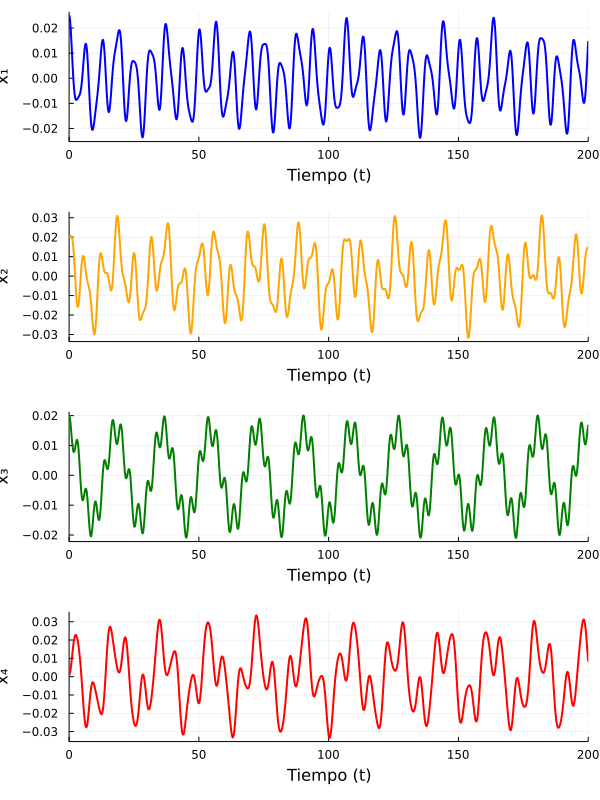

In [11]:
# Parámetros
du0 = zeros(4)
u0 = [0.025, 0.02, 0.02, 0.001]
tspan = (0.0, 200.0)

prob = SecondOrderODEProblem(masas5Resortes!,du0,u0,tspan)

# Paso 2. Resolver el problema
sol = solve(prob)

# Paso 3. Analizar la solución
plot(sol,
     vars=[5, 6, 7, 8],
     linewidth=2,
     xlabel="Tiempo (t)",
     ylabel=["x₁" "x₂" "x₃" "x₄"],
     color=["blue" "orange" "green" "red"],
     legend=false,
     layout=(4,1),
     size=(600, 800))